In [1]:
import requests

r = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD')
r.text

'ï»¿<?xml version="1.0" encoding="utf-8"?>\r\n<wb:data page="1" pages="2" per_page="50" total="62" sourceid="2" sourcename="World Development Indicators" lastupdated="2022-06-30" xmlns:wb="http://www.worldbank.org">\r\n  <wb:data>\r\n    <wb:indicator id="NY.GDP.MKTP.CD">GDP (current US$)</wb:indicator>\r\n    <wb:country id="BR">Brazil</wb:country>\r\n    <wb:countryiso3code>BRA</wb:countryiso3code>\r\n    <wb:date>2021</wb:date>\r\n    <wb:value>1608981220812.2</wb:value>\r\n    <wb:unit />\r\n    <wb:obs_status />\r\n    <wb:decimal>0</wb:decimal>\r\n  </wb:data>\r\n  <wb:data>\r\n    <wb:indicator id="NY.GDP.MKTP.CD">GDP (current US$)</wb:indicator>\r\n    <wb:country id="BR">Brazil</wb:country>\r\n    <wb:countryiso3code>BRA</wb:countryiso3code>\r\n    <wb:date>2020</wb:date>\r\n    <wb:value>1448565936739.56</wb:value>\r\n    <wb:unit />\r\n    <wb:obs_status />\r\n    <wb:decimal>0</wb:decimal>\r\n  </wb:data>\r\n  <wb:data>\r\n    <wb:indicator id="NY.GDP.MKTP.CD">GDP (current 

In [2]:
r_url = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD?format=json&per_page=500&date=1990:2015')

payload = {'format': 'json', 'per_page': '500', 'date':'1990:2015'}
r_payload = requests.get('http://api.worldbank.org/v2/countries/br/indicators/NY.GDP.MKTP.CD', params=payload)

# Test if both results are the same string
r_url.text == r_payload.text

True

In [3]:
# get the World Bank GDP data for Brazil, China and the United States
payload = {'format': 'json', 'per_page': '500', 'date':'1990:2016'}
r = requests.get('http://api.worldbank.org/v2/countries/br;cn;us/indicators/NY.GDP.MKTP.CD', params=payload)

# put the results in a dictionary where each country contains a list of all the x values and all the y values
# this will make it easier to plot the results
from collections import defaultdict
data = defaultdict(list)

for entry in r.json()[1]:
    # check if country is already in dictionary. If so, append the new x and y values to the lists
    if data[entry['country']['value']]:
        data[entry['country']['value']][0].append(int(entry['date']))
        data[entry['country']['value']][1].append(float(entry['value']))       
    else: # if country not in dictionary, then initialize the lists that will hold the x and y values
        data[entry['country']['value']] = [[],[]] 
        data[entry['country']['value']][0].append(int(entry['date']))
        data[entry['country']['value']][1].append(float(entry['value'])) 
# show the results contained in the data dictionary
for country in data:
    print(country)
    print(data[country][0])
    print(data[country][1])
    print('\n')

Brazil
[2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990]
[1802211999538.68, 2456043766028.73, 2472819362216.69, 2465228293894.01, 2616156606666.62, 2208838108577.09, 1666996294372.87, 1695855391810.9, 1397114247331.17, 1107626711406.63, 891633826603.377, 669289321944.516, 558233724164.711, 509795270685.19, 559983704094.17, 655448188259.351, 599642075004.471, 863711007325.493, 883206452795.124, 850426433004.077, 769333330368.987, 525369851353.742, 368295777770.079, 328187944300.908, 342609227209.645, 390725626002.866]


China
[2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990]
[11061553079871.5, 10475682920597.7, 9570406235659.64, 8532229986993.65, 7551500124197.17, 6087163874510.73, 5101703073088.97, 4594307032667.98, 3550342737009.53, 2752131773358.92, 2285965892364.2, 1955347

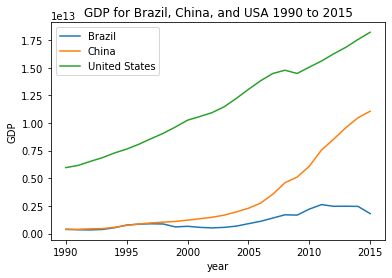

In [4]:
# visualize the results with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# create a plot for each country
for country in data:
    plt.plot(data[country][0], data[country][1], label=country)

# label the plot
plt.title('GDP for Brazil, China, and USA 1990 to 2015')
plt.legend()
plt.xlabel('year')
plt.ylabel('GDP')
plt.show()

In [24]:
#create population growth graph China and India 2013,14,15

payload = {'format': 'json', 'per_page': '500', 'date':'2013:2016'}
r = requests.get('http://api.worldbank.org/v2/countries/cn;in/indicators/SP.POP.TOTL', params=payload)

r.text

'[{"page":1,"pages":1,"per_page":500,"total":8,"sourceid":"2","sourcename":"World Development Indicators","lastupdated":"2022-06-30"},[{"indicator":{"id":"SP.POP.TOTL","value":"Population, total"},"country":{"id":"CN","value":"China"},"countryiso3code":"CHN","date":"2016","value":1387790000,"unit":"","obs_status":"","decimal":0},{"indicator":{"id":"SP.POP.TOTL","value":"Population, total"},"country":{"id":"CN","value":"China"},"countryiso3code":"CHN","date":"2015","value":1379860000,"unit":"","obs_status":"","decimal":0},{"indicator":{"id":"SP.POP.TOTL","value":"Population, total"},"country":{"id":"CN","value":"China"},"countryiso3code":"CHN","date":"2014","value":1371860000,"unit":"","obs_status":"","decimal":0},{"indicator":{"id":"SP.POP.TOTL","value":"Population, total"},"country":{"id":"CN","value":"China"},"countryiso3code":"CHN","date":"2013","value":1363240000,"unit":"","obs_status":"","decimal":0},{"indicator":{"id":"SP.POP.TOTL","value":"Population, total"},"country":{"id":"IN

In [25]:
from collections import defaultdict
data = defaultdict(list)

for entry in r.json()[1]:
    # check if country is already in dictionary. If so, append the new x and y values to the lists
    if data[entry['country']['value']]:
        data[entry['country']['value']][0].append(int(entry['date']))
        data[entry['country']['value']][1].append(float(entry['value']))       
    else: # if country not in dictionary, then initialize the lists that will hold the x and y values
        data[entry['country']['value']] = [[],[]] 

# show the results contained in the data dictionary
for country in data:
    print(country)
    print(data[country][0])
    print(data[country][1])
    print('\n')

China
[2015, 2014, 2013]
[1379860000.0, 1371860000.0, 1363240000.0]


India
[2015, 2014, 2013]
[1310152392.0, 1295600768.0, 1280842119.0]




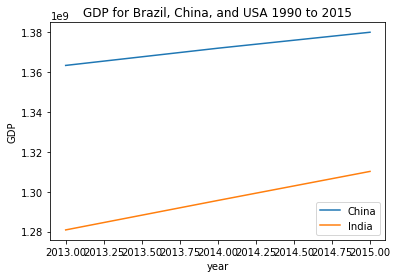

In [26]:
# visualize the results with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# create a plot for each country
for country in data:
    plt.plot(data[country][0], data[country][1], label=country)

# label the plot
plt.title('GDP for Brazil, China, and USA 1990 to 2015')
plt.legend()
plt.xlabel('year')
plt.ylabel('GDP')
plt.show()